[Reference](https://medium.com/@harshit_tyagi/end-to-end-machine-learning-project-tutorial-part-1-ea6de9710c0)

In [1]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2020-08-14 19:55:58--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K  --.-KB/s    in 0.1s    

2020-08-14 19:55:59 (229 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
# reading the .data file using pandas
df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)
#making a copy of the dataframe
data = df.copy()

In [4]:
##checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
##checking for all the null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

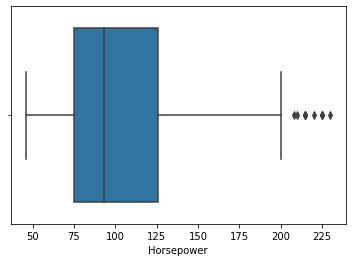

In [6]:
##summary statistics of quantitative variables
data.describe()

##looking at horsepower box plot
sns.boxplot(x=data['Horsepower'])

In [8]:
##category distribution
data["Cylinders"].value_counts() / len(data)

data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

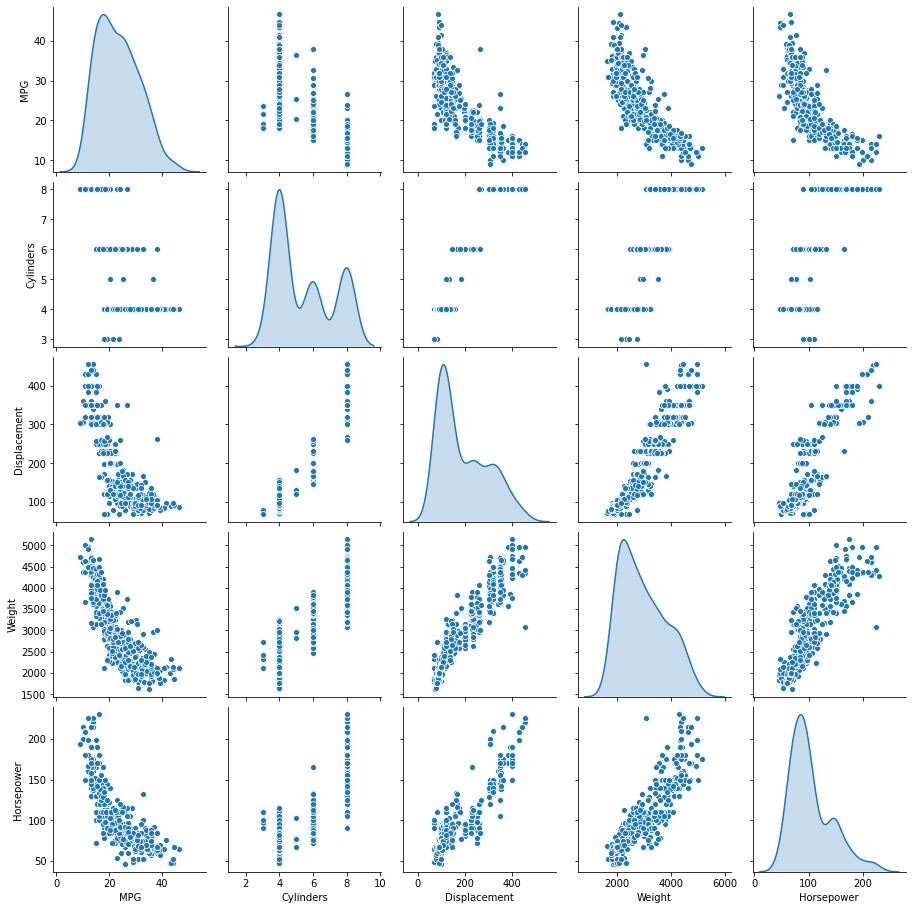

In [9]:
##pairplots to get an intuition of potential correlations
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [12]:
##checking for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [14]:
##converting integer classes to countries in Origin column
strat_train_set['Origin'] = strat_train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
strat_train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
87,13.0,8,350.0,145.0,3988.0,13.0,73,India
285,17.0,8,305.0,130.0,3840.0,15.4,79,India
277,16.2,6,163.0,133.0,3410.0,15.8,78,USA
23,26.0,4,121.0,113.0,2234.0,12.5,70,USA
365,20.2,6,200.0,88.0,3060.0,17.1,81,India
77,22.0,4,121.0,76.0,2511.0,18.0,72,USA
274,20.3,5,131.0,103.0,2830.0,15.9,78,USA
130,26.0,4,122.0,80.0,2451.0,16.5,74,India
164,21.0,6,231.0,110.0,3039.0,15.0,75,India
71,19.0,3,70.0,97.0,2330.0,13.5,72,Germany


In [17]:
##one hot encoding
strat_train_set = pd.get_dummies(strat_train_set, prefix='', prefix_sep='')
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


In [19]:
## testing new variables by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.710556
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.572176
Cylinders               -0.775396
Horsepower              -0.778427
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

# Data Preparation using Sklearn

In [50]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [51]:
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [52]:
##handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [53]:
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df
data_tr = preprocess_origin_cols(data)
data_tr.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


In [54]:
##isolating the origin column
data_cat = data_tr[["Origin"]]
data_cat.head()

,Origin
145,Germany
151,USA
388,India
48,India
114,USA


In [55]:
##onehotencoding the categorical values
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot   # returns a sparse matrix

data_cat_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [56]:
cat_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

##custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4, 83.0, 61.0, 2003.0, 19.0, 74, 'Germany', 0.3114754098360656,
       4.75], dtype=object)

In [58]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

In [59]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [60]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [61]:
##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

In [64]:
##segregate the feature and target variable
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [65]:
##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

In [66]:
##creating custom attribute adder class
acc_ix, hpower_ix, cyl_ix = 4,2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]


In [67]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline


def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [68]:
##from raw data to processed data in 2 steps
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

##from raw data to processed data in 2 steps
preprocessed_df = preprocess_origin_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.85657842, -1.07804475, -1.15192977, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  1.        ,
         0.        ,  0.        ]])

In [69]:
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  1.        ,  0.        ,
        0.        ])

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
##testing the predictions with the 
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))

Prediction of samples:  [29.08069379 27.78336755 26.08031176 12.70419279 22.23454159]


In [72]:
print("Actual Labels of samples: ", list(sample_labels))

Actual Labels of samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


In [73]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9590402225760872

In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [75]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [77]:
tree_reg_rmse_scores

array([2.91520797, 3.03057338, 2.70410567, 3.08848668, 2.27651049,
       3.09354166, 3.31464553, 4.47709448, 4.06630529, 2.76277093])

In [79]:
tree_reg_rmse_scores.mean()

3.172924208886557

In [80]:
scores = cross_val_score(lin_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([3.43254597, 3.45157629, 3.6621715 , 2.59652976, 2.48023405,
       2.74798115, 3.32524647, 2.42208917, 3.78133275, 2.8573747 ])

In [81]:
lin_reg_rmse_scores.mean()

3.0757081793709333

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.546417007620695

In [83]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

3.08659162080283

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [85]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [86]:
cv_scores = grid_search.cv_results_

##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.395079753445869 {'max_features': 2, 'n_estimators': 3}
2.924192863203396 {'max_features': 2, 'n_estimators': 10}
2.853865992913955 {'max_features': 2, 'n_estimators': 30}
3.4335527679380515 {'max_features': 4, 'n_estimators': 3}
2.8249462527002454 {'max_features': 4, 'n_estimators': 10}
2.676032273482261 {'max_features': 4, 'n_estimators': 30}
3.16010810987995 {'max_features': 6, 'n_estimators': 3}
2.784457137831242 {'max_features': 6, 'n_estimators': 10}
2.7005216976569786 {'max_features': 6, 'n_estimators': 30}
3.2055110649124243 {'max_features': 8, 'n_estimators': 3}
2.80048596013321 {'max_features': 8, 'n_estimators': 10}
2.7188491867953313 {'max_features': 8, 'n_estimators': 30}
3.3386846829532106 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.013077288750468 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.425282998537739 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.908849985112174 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [87]:
# feature importances 

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07939231, 0.3222618 , 0.1492997 , 0.17781887, 0.02322467,
       0.11049571, 0.04656473, 0.06654751, 0.00524741, 0.01604483,
       0.00310246])

In [89]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('acc_on_power', 0.04656473023336267),
 ('acc_on_cyl', 0.06654751329522601),
 ('Weight', 0.17781887032878738),
 ('Model Year', 0.11049570561075003),
 ('Horsepower', 0.14929969563574033),
 ('Displacement', 0.322261801631291),
 ('Cylinders', 0.07939230852990017),
 ('Acceleration', 0.023224673113843478)]

In [90]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

X_test_preprocessed = preprocess_origin_cols(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [91]:
final_rmse

3.032854907325586

In [92]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [93]:
##checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([34.67333333, 17.85666667, 19.39666667])

In [94]:
import pickle

In [95]:
##saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [96]:
##loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([34.67333333, 17.85666667, 19.39666667])